In [1]:
import numpy as np
from random import uniform
from functions import quadratic, ridge_reg, himmelblaus, rosenbrock
from plots import plot_surface, plot_contour
from grad_descent import grad_descent, grad_descent_backtrack
import matplotlib.pyplot as plt

# Question 1
### Quadratic
It is easy to see from the surface plot below that the given quadratic function is convex.

For $f(x, y) = 1.125x^2 + 0.5xy + 0.75y^2 + 2x + 2y$,

$\nabla^2 f = 
  \left[ {\begin{array}{cc}
   1.125 & 0.5 \\
   0.5 & 0.75 \\
  \end{array} } \right]
$

whose eigen values are 2.943 and 0.8069 which means its Hessian is positive definite and that the function is convex, in fact, strictly convex.

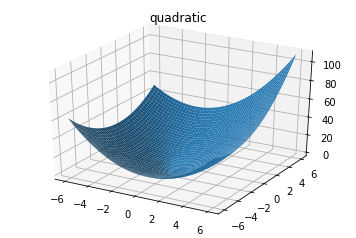

In [2]:
plot_surface((-6, 6), (-6, 6), quadratic, title='quadratic', show=True)


### Ridge regression

From the plot, it looks like the function is convex.

We also can see that for $f(x) = 0.5(x^2 + y^2) + 50 log(1 + e^{-0.5y}) + 50 log(1 + e^{0.2x})$,

$\nabla^2 f =
\left[ {\begin{array}{cc}
   1 & 0 \\
   0 & 1 \\
  \end{array} } \right]
$ which is just the identity matrix, so this function is indeed convex

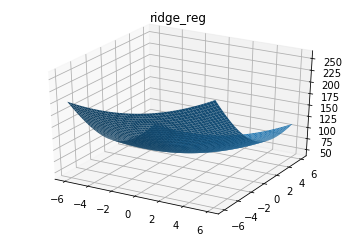

In [3]:
plot_surface((-6, 6), (-6, 6), ridge_reg, title='ridge_reg', show=True)

### Himmelblaus

From the plot, it is easy to see that the function is not convex.

We can also show that

$f(4, -6) = 109$ and $f(-4, -6) = 62.6$

According to Jenson's inequality,

$f(0, -6) <= 85.8$ but $f(0, -6) = 113$

Hence, this function is not convex

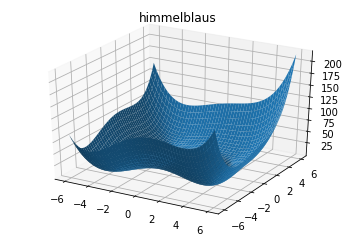

In [4]:
plot_surface((-6, 6), (-6, 6), himmelblaus, title='himmelblaus', show=True)

### rosenbrock

From the figure it is easy to see that the function is not convex

We can verify that

$f(-3, 6) = 1.832$ and $f(3, 6) = 1.808$

According to Jenson's inequality,

$f(0, -6) <= 1.82$ but $f(0, -6) = 7.202$

Hence, this function is not convex

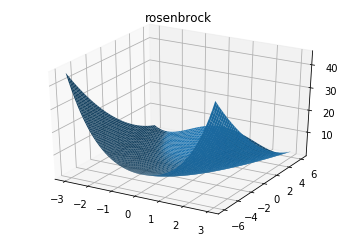

In [5]:
plot_surface((-3, 3), (-6, 6), rosenbrock, title='rosenbrock', show=True)

# Question 2
### Generating Random points for 2, 3 and 4

In [6]:
random_pt = [(uniform(-3, 3), uniform(-6, 6)), (uniform(-3, 3), uniform(-6, 6))]

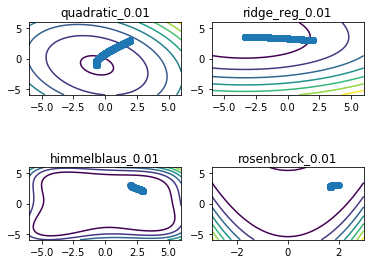

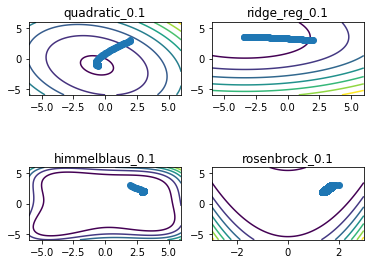

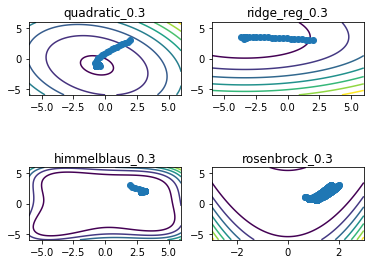

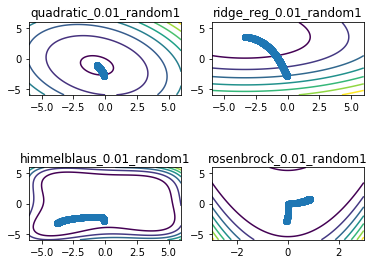

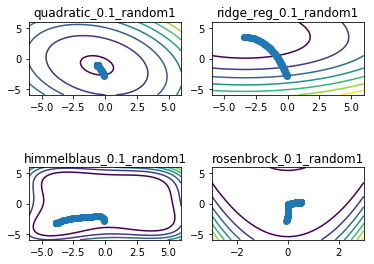

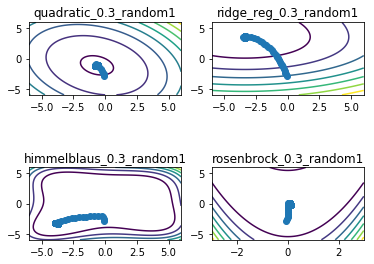

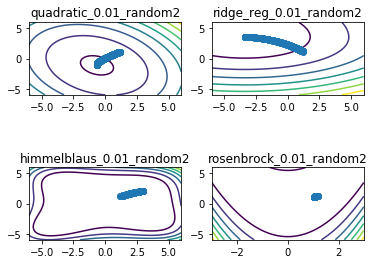

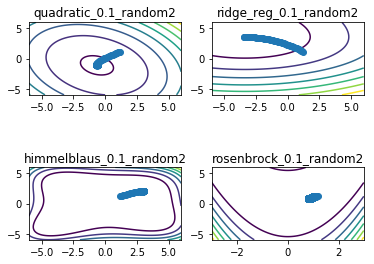

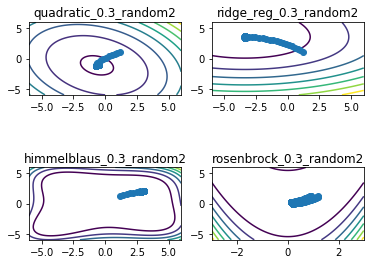

In [7]:
for cnt in range(3):
    for stepsize in [0.01, 0.1, 0.3]:
        fig = plt.figure()
        fig.subplots_adjust(hspace=1)
        fig_plot = plot_contour((-6, 6), (-6, 6), quadratic, fig, subplot_num=221, title='quadratic_' + str(stepsize) + ('_random' + str(cnt) if cnt else ''))
        x, y = grad_descent((-6, 6), (-6, 6), quadratic, stepsize=stepsize, start_pt=random_pt[cnt - 1] if cnt else (2, 3))
        fig_plot.plot(x, y, marker='o')

        fig_plot = plot_contour((-6, 6), (-6, 6), ridge_reg, fig, subplot_num=222, title='ridge_reg_' + str(stepsize) + ('_random' + str(cnt) if cnt else ''))
        x, y = grad_descent((-6, 6), (-6, 6), ridge_reg, stepsize=stepsize, start_pt=random_pt[cnt - 1] if cnt else (2, 3))
        fig_plot.plot(x, y, marker='o')

        fig_plot = plot_contour((-6, 6), (-6, 6), himmelblaus, fig, subplot_num=223, title='himmelblaus_' + str(stepsize) + ('_random' + str(cnt) if cnt else ''))
        x, y = grad_descent((-6, 6), (-6, 6), himmelblaus, stepsize=stepsize, start_pt=random_pt[cnt - 1] if cnt else (2, 3))
        fig_plot.plot(x, y, marker='o')

        fig_plot = plot_contour((-3, 3), (-6, 6), rosenbrock, fig, subplot_num=224, title='rosenbrock_' + str(stepsize) + ('_random' + str(cnt) if cnt else ''))
        x, y = grad_descent((-3, 3), (-6, 6), rosenbrock, stepsize=stepsize, start_pt=random_pt[cnt - 1] if cnt else (2, 3))
        fig_plot.plot(x, y, marker='o')
        plt.savefig(str(stepsize) + ('_random' + str(cnt) if cnt else '') + '.png')
        plt.show()

We can see that since both quadratic and ridge regularized logistic regression are strictly convex, gradient descent reaches the global minima. Furthermore it reaches the global minima in all the cases in a 1000 iterations even with the smallest step size of $0.01$ so 0.01 is sufficient to get to minima in a 1000 iterations.

However the Himmelblaus function is not convex and has multiple local minimas. We see that for different initializations, gradient descent converges to different local minimas.

Although the Rosenbrock function is not convex, it only has 1 global minima at $(0.002, 0.002^2)$. The gradient descent can be seen to approach the global minima. We can also see that starting at $(2, 3)$, the step size of $0.01$ or $0.1$ is too small due to the small value of gradient there. Same is the case with other initializations, only with a step size of $0.3$ does it reach close to the global minima. For other random points, due to the eigenvalues of this function not being fixed, it sometimes leads to divergence as well

# Question 3

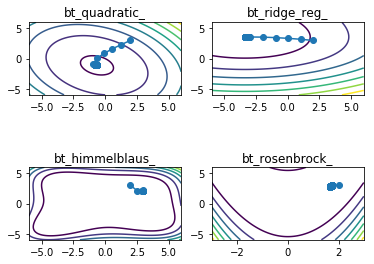

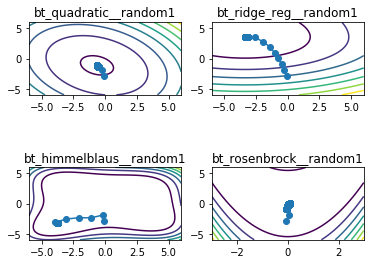

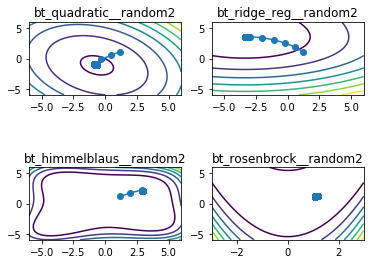

In [8]:
for cnt in range(3):
    fig = plt.figure()
    fig.subplots_adjust(hspace=1)
    fig_plot = plot_contour((-6, 6), (-6, 6), quadratic, fig, subplot_num=221, title='bt_quadratic_' + ('_random' + str(cnt) if cnt else ''))
    x, y = grad_descent_backtrack((-6, 6), (-6, 6), quadratic, start_pt=random_pt[cnt - 1] if cnt else (2, 3))
    fig_plot.plot(x, y, marker='o')

    fig_plot = plot_contour((-6, 6), (-6, 6), ridge_reg, fig, subplot_num=222, title='bt_ridge_reg_' + ('_random' + str(cnt) if cnt else ''))
    x, y = grad_descent_backtrack((-6, 6), (-6, 6), ridge_reg, start_pt=random_pt[cnt - 1] if cnt else (2, 3))
    fig_plot.plot(x, y, marker='o')

    fig_plot = plot_contour((-6, 6), (-6, 6), himmelblaus, fig, subplot_num=223, title='bt_himmelblaus_' + ('_random' + str(cnt) if cnt else ''))
    x, y = grad_descent_backtrack((-6, 6), (-6, 6), himmelblaus, start_pt=random_pt[cnt - 1] if cnt else (2, 3))
    fig_plot.plot(x, y, marker='o')

    fig_plot = plot_contour((-3, 3), (-6, 6), rosenbrock, fig, subplot_num=224, title='bt_rosenbrock_' + ('_random' + str(cnt) if cnt else ''))
    x, y = grad_descent_backtrack((-3, 3), (-6, 6), rosenbrock, start_pt=random_pt[cnt - 1] if cnt else (2, 3))
    fig_plot.plot(x, y, marker='o')
    plt.savefig('backtrack' + ('_random' + str(cnt) if cnt else '') + '.png')
    plt.show()

We see a much faster convergence in case of both quadratic and ridge regularized logistic regression, on using backtracking line search. Since both the functions are strictly convex, backtracking line search should be faster (in terms of number of steps) and we can see that it took only ~10 steps even when initial point was far away from the global minima (this can be predicted based on the relatively large value of the smallest eigenvalue of $\nabla^2 f$)

However, since the backtracking line search does not do anything more different than provide and adaptive step size, the problem of reaching different local minimas in case of the Himmelblaus function remains.

In case of the Rosenbrock function, backtrack line search sometime performs worse than a step size of $0.3$. This is because of the very small value of gradient. We can see that the first few steps are very big and it is moving relatively quickly to the minima(in fact, faster than with a step size of $0.3$). However, once it reaches a neighbourhood where gradient is small, the step size becomes extremely small and the performance resembles that of gradient descent with a step size of $0.01$.

# Question 4

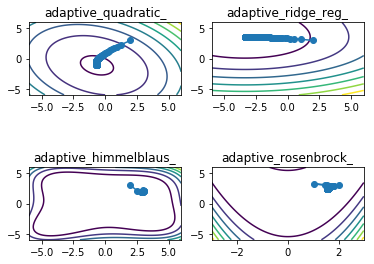

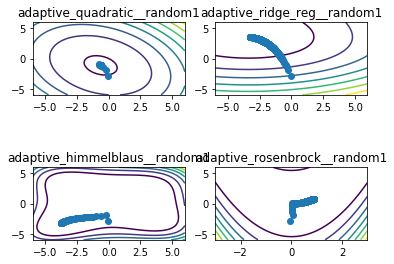

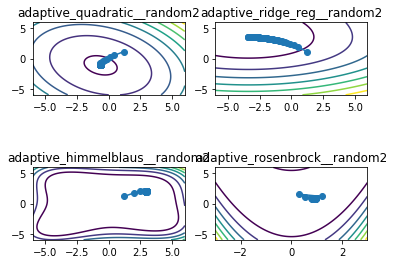

In [9]:
for cnt in range(3):
    fig = plt.figure()
    fig.subplots_adjust(hspace=1)
    fig_plot = plot_contour((-6, 6), (-6, 6), quadratic, fig, subplot_num=221, title='adaptive_quadratic_' + ('_random' + str(cnt) if cnt else ''))
    x, y = grad_descent((-6, 6), (-6, 6), quadratic, adaptive=True, start_pt=random_pt[cnt - 1] if cnt else (2, 3))
    fig_plot.plot(x, y, marker='o')

    fig_plot = plot_contour((-6, 6), (-6, 6), ridge_reg, fig, subplot_num=222, title='adaptive_ridge_reg_' + ('_random' + str(cnt) if cnt else ''))
    x, y = grad_descent((-6, 6), (-6, 6), ridge_reg, adaptive=True, start_pt=random_pt[cnt - 1] if cnt else (2, 3))
    fig_plot.plot(x, y, marker='o')

    fig_plot = plot_contour((-6, 6), (-6, 6), himmelblaus, fig, subplot_num=223, title='adaptive_himmelblaus_' + ('_random' + str(cnt) if cnt else ''))
    x, y = grad_descent((-6, 6), (-6, 6), himmelblaus, adaptive=True, start_pt=random_pt[cnt - 1] if cnt else (2, 3))
    fig_plot.plot(x, y, marker='o')

    fig_plot = plot_contour((-3, 3), (-6, 6), rosenbrock, fig, subplot_num=224, title='adaptive_rosenbrock_' + ('_random' + str(cnt) if cnt else ''))
    x, y = grad_descent((-3, 3), (-6, 6), rosenbrock, adaptive=True, start_pt=random_pt[cnt - 1] if cnt else (2, 3))
    fig_plot.plot(x, y, marker='o')
    plt.savefig("adaptive_ratio" + ('_random' + str(cnt) if cnt else '') + '.png')
    plt.show()

The steps get progressively smaller for quadratic and ridge regularized logistic regression functions but it converges to the global minima.

We can see the same problem as above for the Himmelblaus function i.e. it converges at different local minimas for different initializations.

In case of the Rosenbrock function, none of the trials reach close to global minima since, in the neighbourhood of the minima, the gradients are very small and using $\frac{1}{k}$ as the step size, we keep decreasing the step size each step, thus making the updates miniscule and 1000 iterations end up not being enough with such small update values

# Question 5

For some problems if the step size is too big, gradient descent can diverge instead of converging. This depends on the eigen values of the Hessian of the function.

We know that the ideal stepsize is $\alpha_{ideal} = \frac{1}{\gamma_{min} + \gamma_{max}}$ where $\gamma_{min}$ and $\gamma_{max}$ are the minimum and the maximum eigenvalues of the Hessian.

For stepsize $\geq 2\alpha_{ideal}$, gradient descent leads to divergence

The eigen values of the quadratic and the ridge regularized logistic regression function are fixed and thus the same stepsize works once it is determined that it'll lead to convergence whereas for the Himmelblaus and the Rosenbrock function, eigenvalues of the Hessian are not fixed and depends on the point at which they are being calculated. This means we should be extra careful while setting a stepsize for them.